#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [27]:
## import cv2
## import numpy
## import matplotlib pyplot
## import KMeans cluster from sklearn
## import distance from scipy.spatial

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


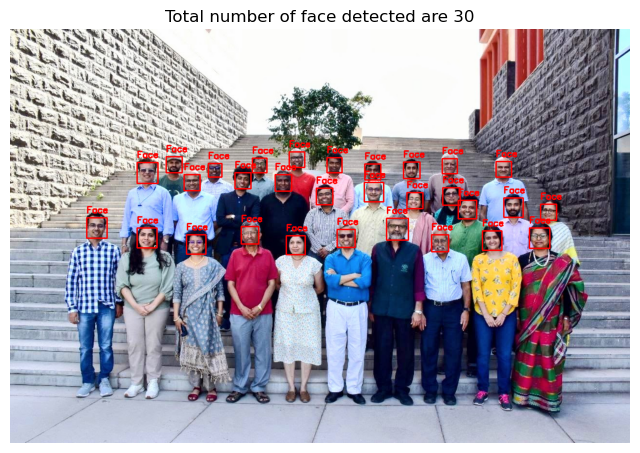

In [41]:
## Reading the image plaksha_Faculty.jpg
image = cv2.imread("Plaksha_Faculty.jpg")

## Convert the image to grayscale
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))

# Define the text and font parameters
text = "Face"  ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.6  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (Red)
font_thickness = 2  ## Thickness of the text

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.putText(image, text, (x, y-10), font, font_scale, font_color, font_thickness)

## Display the image and window title should be "Total number of face detected are #"
plt.figure(figsize=(8,6))
plt.title("Total number of face detected are " + str(len(faces_rect)))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [42]:
# Convert BGR image to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Create list to store hue and saturation values
hue_saturation = []

# Loop through detected faces
for (x, y, w, h) in faces_rect:
    face_region = hsv_image[y:y+h, x:x+w]
    
    # Take mean Hue and Saturation of the face region
    mean_hue = np.mean(face_region[:, :, 0])
    mean_saturation = np.mean(face_region[:, :, 1])
    
    hue_saturation.append([mean_hue, mean_saturation])

# Convert to numpy array
hue_saturation = np.array(hue_saturation)


In [43]:
face_images = []

for (x, y, w, h) in faces_rect:
    face = image[y:y+h, x:x+w]
    face_hsv = cv2.cvtColor(face, cv2.COLOR_BGR2HSV)
    face_images.append(face_hsv)


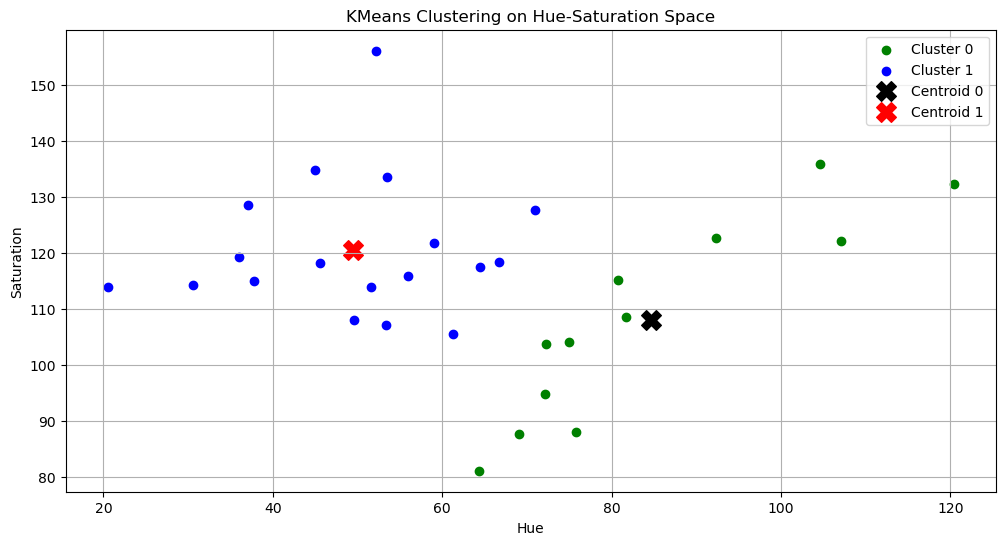

In [49]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

kmeans = KMeans(n_clusters=2)
kmeans.fit(hue_saturation)


# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color='black', marker='X', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='red', marker='X', s=200, label='Centroid 1')

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("KMeans Clustering on Hue-Saturation Space")

## Add a legend
plt.legend()

## Add grid
plt.grid(True)

## Show the plot
plt.show()


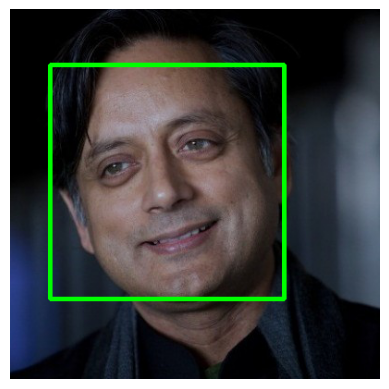

In [50]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")

# Detect face  in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY), 1.05, 4)

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()



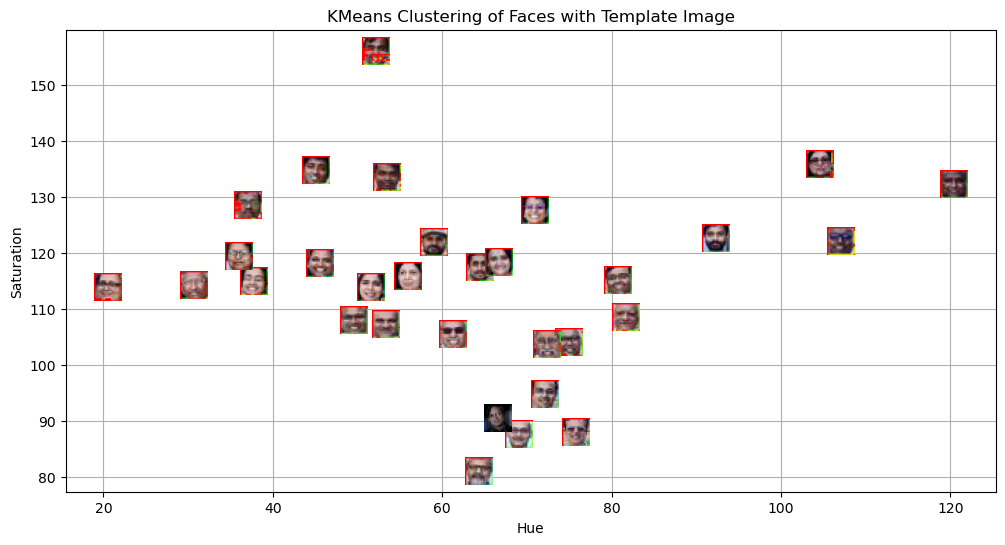

In [51]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("KMeans Clustering of Faces with Template Image")

## Add grid
plt.grid(True)

## show plot
plt.show()


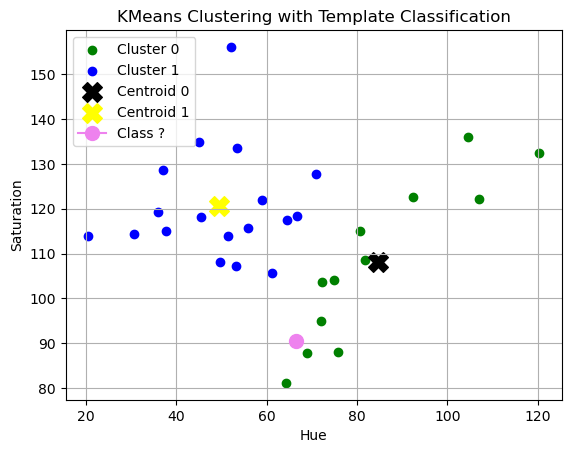

In [52]:
# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

plt.scatter(centroid_0[0], centroid_0[1], marker='X', c='black', s=200, label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], marker='X', c='yellow', s=200, label='Centroid 1')  ## plot for centroid 1

plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Class ?')

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("KMeans Clustering with Template Classification")

## Add a legend
plt.legend()

## Add grid
plt.grid(True)

## show the plot
plt.show()

                                            ## End of the lab 5 ##


## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

1. Euclidean distance
2. Manhattan distance
3. Mahalanobis distance
4. Hamming distance
5. Chebyshev distance 
6. Cosine distance.
7. Minkowski distance

#### 2. What are some real-world applications of distance-based classification algorithms? 
1. Face recognition
2. Handwriting recognition
3. Recommendation systems (like suggesting movies)
4. Spam detection
5. Image classification

#### 3. Explain various distance metrics. 

#### 1. Euclidean distance :
Represents the shortest distance between two vectors.
Most widely-used distance metric.
Quite easy to calculate.
Does not account for the distribution of the data
#### 2. Manhattan distance :
Also called city-block distance.
Measures distance by adding absolute differences of coordinates.
Useful when data follows grid-like paths.
Less sensitive to outliers compared to Euclidean
#### 3. Mahalanobis distance :
Measures distance considering the distribution of the data.
Takes correlation between variables into account.
Useful when features are related to each other.
More accurate for multivariate data.
#### 4. Hamming distance :
Used for categorical or binary data.
Counts the number of positions where values are different.
Very simple to compute.
Common in text and coding theory
#### 5. Chebyshev distance
Measures the maximum absolute difference between coordinates.
Also called maximum value distance.
Useful in chess-like movement problems.
Sensitive to the largest difference only
#### 6. Cosine distance : 
Measures the angle between two vectors.
Does not depend on magnitude, only direction.
Widely used in text classification and NLP.
Good for high-dimensional data.
#### 7. Minkowski distance:
General form of Euclidean and Manhattan distance.
Controlled by a parameter (p value).
If p = 1 → Manhattan distance.
If p = 2 → Euclidean distance.
Flexible and adjustable metric.

#### 4. What is the role of cross validation in model performance? 

If we train our model only once using one train-test split, it may not show the true performance of the model. The result can depend too much on how the data was split.

In cross validation, we divide the dataset into multiple parts. Each time, we use some parts for training and one part for validation. We repeat this process several times by changing the training and validation sets.

This helps to Avoid overfitting and give better accuracy estimate. Also help in choose best value of K in KNN
#### 5. Explain variance and bias in terms of KNN? 
If K is small (like K = 1)
The model becomes very sensitive to individual data points.
It may change a lot if the data changes slightly.
This means high variance and low bias.
It can lead to overfitting.

If K is large
The model looks at many neighbors and becomes smoother.
It may ignore small patterns in the data.
This means high bias and low variance.
It can lead to underfitting.

In short we can say, a high value of K increases bias while a low value of K increases
variance.
